In [ ]:
import pandas as pd
import numpy as np
import os

INPUT_PATHS = [
    "/mnt/data/us_perm_visas.csv",
    "/content/us_perm_visas.csv",
    "us_perm_visas.csv"
]
OUTPUT_PATH = "/mnt/data/us_perm_visas_preprocessed.csv"


INPUT_PATH = next((p for p in INPUT_PATHS if os.path.exists(p)), None)
print("Selected INPUT_PATH =", INPUT_PATH)
print("OUTPUT_PATH =", OUTPUT_PATH)


Selected INPUT_PATH = /content/us_perm_visas.csv
OUTPUT_PATH = /mnt/data/us_perm_visas_preprocessed.csv


In [ ]:
if INPUT_PATH:
    df = pd.read_csv(INPUT_PATH, low_memory=False)
    print(f"Loaded file: {INPUT_PATH} -> shape: {df.shape}")
else:
    print("Input file not found. Creating a synthetic sample for demonstration.")
    df = pd.DataFrame({
        "case_id":[1,2,3,4],
        "received_date":["2019-10-01","2019-11-05","2020-01-15","2020-02-10"],
        "decision_date":["2020-02-01","2020-01-20","2020-02-20", None],
        "employer_name":["A Corp","B LLC","C Inc","D Ltd"],
        "job_title":["SWE","Data Scientist","Analyst","SWE"],
        "wage":[120000, 110000, np.nan, 90000],
        "case_status":["Certified","Denied","Certified","Certified"],
        "country_of_birth":["India","China","India","USA"]
    })
    print("Synthetic sample shape:", df.shape)

display(df.head())
print("Columns:", df.columns.tolist())


Loaded file: /content/us_perm_visas.csv -> shape: (374362, 154)


,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


Columns: ['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name', 'agent_state', 'application_type', 'case_no', 'case_number', 'case_received_date', 'case_status', 'class_of_admission', 'country_of_citizenship', 'country_of_citzenship', 'decision_date', 'employer_address_1', 'employer_address_2', 'employer_city', 'employer_country', 'employer_decl_info_title', 'employer_name', 'employer_num_employees', 'employer_phone', 'employer_phone_ext', 'employer_postal_code', 'employer_state', 'employer_yr_estab', 'foreign_worker_info_alt_edu_experience', 'foreign_worker_info_birth_country', 'foreign_worker_info_city', 'foreign_worker_info_education', 'foreign_worker_info_education_other', 'foreign_worker_info_inst', 'foreign_worker_info_major', 'foreign_worker_info_postal_code', 'foreign_worker_info_rel_occup_exp', 'foreign_worker_info_req_experience', 'foreign_worker_info_state', 'foreign_worker_info_training_comp', 'foreign_worker_ownership_interest', 'foreign_worker_yr_rel_edu_complet

In [ ]:
def detect_date_cols(df):
    parse_counts = {}
    for col in df.columns:
        parsed = pd.to_datetime(df[col], errors='coerce', infer_datetime_format=True)
        parse_counts[col] = int(parsed.notna().sum())
    return sorted(parse_counts.items(), key=lambda x: -x[1])

date_candidates = detect_date_cols(df)
print("Top date-like columns (col, parseable_count):")
print(date_candidates[:8])


/tmp/ipython-input-2364048138.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  parsed = pd.to_datetime(df[col], errors='coerce', infer_datetime_format=True)
/tmp/ipython-input-2364048138.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(df[col], errors='coerce', infer_datetime_format=True)
/tmp/ipython-input-2364048138.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  parsed = pd.to_datet

Top date-like columns (col, parseable_count):
[('decision_date', 374362), ('case_received_date', 239091), ('employer_num_employees', 239013), ('employer_yr_estab', 238958), ('pw_determ_date', 238768), ('pw_expire_date', 238621), ('recr_info_first_ad_start', 232933), ('recr_info_swa_job_order_start', 232918)]


/tmp/ipython-input-2364048138.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  parsed = pd.to_datetime(df[col], errors='coerce', infer_datetime_format=True)
/tmp/ipython-input-2364048138.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(df[col], errors='coerce', infer_datetime_format=True)


In [ ]:
def pick_start_end(date_candidates):
    cols = [c for c,_ in date_candidates if _>0]
    start = None; end = None
    start_keywords = ['received','receive','file','submitted','start','application','submit']
    end_keywords = ['decision','approve','approval','certified','complete','completed','end','adjudicated']
    for c in cols:
        lc = c.lower()
        if any(k in lc for k in start_keywords) and start is None:
            start = c
        if any(k in lc for k in end_keywords) and end is None:
            end = c
    if (start is None or end is None) and len(cols) >= 2:
        start, end = cols[0], cols[1]
    if start and end and start == end:
        end = None
    return start, end

start_col, end_col = pick_start_end(date_candidates)
print("Chosen start column:", start_col)
print("Chosen end   column:", end_col)


Chosen start column: case_received_date
Chosen end   column: decision_date


In [ ]:

if start_col:
    df['_start_dt'] = pd.to_datetime(df[start_col], errors='coerce', infer_datetime_format=True)
if end_col:
    df['_end_dt'] = pd.to_datetime(df[end_col], errors='coerce', infer_datetime_format=True)

if start_col and end_col:
    df['processing_time_days'] = (df['_end_dt'] - df['_start_dt']).dt.days
    df.loc[df['processing_time_days'] < 0, 'processing_time_days'] = np.nan
    df.loc[df['processing_time_days'] > 3650, 'processing_time_days'] = np.nan
else:
    df['processing_time_days'] = np.nan

print("processing_time_days sample:")
print(df[['processing_time_days', start_col, end_col]].head(10).to_string())


processing_time_days sample:
   processing_time_days case_received_date decision_date
0                   NaN                NaN    2012-02-01
1                   NaN                NaN    2011-12-21
2                   NaN                NaN    2011-12-01
3                   NaN                NaN    2011-12-01
4                   NaN                NaN    2012-01-26
5                   NaN                NaN    2012-01-26
6                   NaN                NaN    2011-10-07
7                   NaN                NaN    2012-02-06
8                   NaN                NaN    2012-02-29
9                   NaN                NaN    2012-03-30


/tmp/ipython-input-3298802059.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['_start_dt'] = pd.to_datetime(df[start_col], errors='coerce', infer_datetime_format=True)
/tmp/ipython-input-3298802059.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['_end_dt'] = pd.to_datetime(df[end_col], errors='coerce', infer_datetime_format=True)


In [ ]:
print("Missing counts (top):")
print(df.isna().sum().sort_values(ascending=False).head(20))

missing_target = df['processing_time_days'].isna().sum()
print(f"\nRows with missing target 'processing_time_days': {missing_target}")

df_model = df.dropna(subset=['processing_time_days']).copy()
print("After dropping rows without target:", df_model.shape)

numeric_cols = df_model.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c != 'processing_time_days']
for c in numeric_cols:
    med = df_model[c].median()
    df_model[c] = df_model[c].fillna(med)

cat_cols = df_model.select_dtypes(include=['object','string']).columns.tolist()
for c in cat_cols:
    df_model[c] = df_model[c].fillna('Unknown')

print("\nAfter basic imputation, sample:")
display(df_model.head())


Missing counts (top):
orig_file_date                         374081
orig_case_no                           374068
recr_info_job_fair_to                  372569
recr_info_job_fair_from                372564
recr_info_on_campus_recr_to            372497
recr_info_on_campus_recr_from          372490
ji_live_in_dom_svc_contract            371964
foreign_worker_info_education_other    370422
job_info_training_field                369883
job_info_training_num_months           369583
ri_coll_teach_select_date              368632
ri_coll_teach_pro_jnl                  368630
fw_info_education_other                368019
ri_coll_tch_basic_process              367349
recr_info_coll_teach_comp_proc         367341
job_info_education_other               366593
job_info_alt_combo_ed_other            365163
recr_info_pro_org_advert_to            360292
recr_info_pro_org_advert_from          360286
pw_source_name_other_9089              358603
dtype: int64

Rows with missing target 'processing_time_da

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089,_start_dt,_end_dt,processing_time_days
135269,Unknown,Milwaukee,Reinhart Boerner Van Deuren s.c.,WISCONSIN,Unknown,Unknown,A-13316-14231,2013-11-19,Certified,H-1B,...,Unknown,"90,000.00","95,000.00",Year,NaN,NaN,Unknown,2013-11-19,2015-05-29,556.0
135270,Unknown,RALEIGH,"Global Labor Solutions, LLC",NORTH CAROLINA,Unknown,Unknown,A-13316-14287,2013-11-12,Denied,Unknown,...,Unknown,"16,973.00",Unknown,Year,NaN,NaN,Unknown,2013-11-12,2015-06-26,591.0
135271,Unknown,Littleton,Law Office of Jonathan Chin,COLORADO,Unknown,Unknown,A-13316-14312,2013-11-27,Denied,H-1B,...,Unknown,"65,000.00",Unknown,Year,NaN,NaN,Unknown,2013-11-27,2014-10-16,323.0
135272,Unknown,Los Angeles,Law Offices Peter A. Kim,CALIFORNIA,Unknown,Unknown,A-13316-14276,2013-11-13,Certified,E-2,...,Unknown,"43,514.00",Unknown,Year,NaN,NaN,Unknown,2013-11-13,2015-05-26,559.0
135273,Unknown,RALEIGH,"Global Labor Solutions, LLC",NORTH CAROLINA,Unknown,Unknown,A-13316-14275,2013-11-12,Denied,Unknown,...,Unknown,"16,973.00",Unknown,Year,NaN,NaN,Unknown,2013-11-12,2015-06-26,591.0


In [ ]:

def encode_categoricals_fast(df, onehot_thresh=8, max_total_onehot_cols=1000):
    df2 = df.copy()
    cat_cols = df2.select_dtypes(include=['object','string']).columns.tolist()
    onehot_cols = []
    freq_cols = []
    total_onehot_new_cols = 0
    for col in cat_cols:
        n_unique = df2[col].nunique(dropna=False)
        if n_unique <= onehot_thresh:
            total_onehot_new_cols += n_unique
            if total_onehot_new_cols <= max_total_onehot_cols:
                onehot_cols.append(col)
            else:
                freq_cols.append(col)
        else:
            freq_cols.append(col)

    if onehot_cols:
        dummies = pd.get_dummies(df2[onehot_cols].astype(str), prefix=onehot_cols, dummy_na=False)
        df2 = pd.concat([df2.drop(columns=onehot_cols), dummies], axis=1)

    for col in freq_cols:
        freq = df2[col].value_counts(normalize=True)
        df2[col + "_freq_enc"] = df2[col].map(freq).fillna(0.0)
        df2 = df2.drop(columns=[col])

    return df2

df_preprocessed = encode_categoricals_fast(df_model, onehot_thresh=8, max_total_onehot_cols=1000)
print("Preprocessed shape:", df_preprocessed.shape)
print("Columns (first 40):", df_preprocessed.columns.tolist()[:40])
display(df_preprocessed.head())


Preprocessed shape: (239091, 294)
Columns (first 40): ['employer_num_employees', 'employer_yr_estab', 'foreign_worker_yr_rel_edu_completed', 'fw_info_yr_rel_edu_completed', 'job_info_alt_cmb_ed_oth_yrs', 'job_info_alt_occ_num_months', 'job_info_experience_num_months', 'job_info_training_num_months', 'wage_offered_from_9089', 'wage_offered_to_9089', '_start_dt', '_end_dt', 'processing_time_days', 'add_these_pw_job_title_9089_Unknown', 'application_type_Unknown', 'case_no_Unknown', 'case_status_Certified', 'case_status_Certified-Expired', 'case_status_Denied', 'case_status_Withdrawn', 'country_of_citzenship_Unknown', 'employer_country_CAMEROON', 'employer_country_CANADA', 'employer_country_GERMANY', 'employer_country_JAPAN', 'employer_country_SOUTH KOREA', 'employer_country_UNITED STATES OF AMERICA', 'employer_country_Unknown', 'foreign_worker_info_alt_edu_experience_A', 'foreign_worker_info_alt_edu_experience_N', 'foreign_worker_info_alt_edu_experience_Unknown', 'foreign_worker_info_alt

,employer_num_employees,employer_yr_estab,foreign_worker_yr_rel_edu_completed,fw_info_yr_rel_edu_completed,job_info_alt_cmb_ed_oth_yrs,job_info_alt_occ_num_months,job_info_experience_num_months,job_info_training_num_months,wage_offered_from_9089,wage_offered_to_9089,...,ri_employer_web_post_from_freq_enc,ri_employer_web_post_to_freq_enc,ri_job_search_website_from_freq_enc,ri_job_search_website_to_freq_enc,ri_local_ethnic_paper_from_freq_enc,ri_local_ethnic_paper_to_freq_enc,ri_pvt_employment_firm_from_freq_enc,ri_pvt_employment_firm_to_freq_enc,wage_offer_from_9089_freq_enc,wage_offer_to_9089_freq_enc
135269,1935.0,1959.0,2002.0,2007.0,5.0,84.0,24.0,36.0,NaN,NaN,...,0.000163,0.000075,0.000343,0.000092,0.494423,0.494423,0.931231,0.931240,0.004425,0.001133
135270,350.0,1988.0,2006.0,2007.0,5.0,24.0,24.0,36.0,NaN,NaN,...,0.428519,0.428611,0.176928,0.176970,0.494423,0.494423,0.931231,0.931240,0.000510,0.711470
135271,4.0,1996.0,20.0,2007.0,5.0,24.0,36.0,36.0,NaN,NaN,...,0.428519,0.428611,0.000100,0.000067,0.000075,0.000155,0.931231,0.931240,0.001468,0.711470
135272,8.0,2010.0,2007.0,2007.0,5.0,24.0,24.0,36.0,NaN,NaN,...,0.428519,0.428611,0.000301,0.000067,0.000013,0.000017,0.000008,0.000004,0.000013,0.711470
135273,350.0,1988.0,2006.0,2007.0,5.0,24.0,24.0,36.0,NaN,NaN,...,0.428519,0.428611,0.176928,0.176970,0.494423,0.494423,0.931231,0.931240,0.000510,0.711470


In [ ]:
out_dir = os.path.dirname(OUTPUT_PATH)
if out_dir and not os.path.exists(out_dir):
    try:
        os.makedirs(out_dir)
    except Exception:
        pass

df_preprocessed.to_csv(OUTPUT_PATH, index=False)
print("Saved preprocessed file to:", OUTPUT_PATH)

if 'processing_time_days' in df_preprocessed.columns:
    print("\nprocessing_time_days summary:")
    print(df_preprocessed['processing_time_days'].describe())
else:
    print("processing_time_days not present in preprocessed dataframe.")


Saved preprocessed file to: /mnt/data/us_perm_visas_preprocessed.csv

processing_time_days summary:
count    239091.000000
mean        208.082797
std         200.087935
min           0.000000
25%         109.000000
50%         161.000000
75%         205.000000
max        3413.000000
Name: processing_time_days, dtype: float64


In [ ]:
from google.colab import files

files.download(OUTPUT_PATH)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_context("notebook")


In [ ]:
DATA_PATH = "/content/us_perm_visas_preprocessed.csv"

df = pd.read_csv(DATA_PATH)
print("Dataset shape:", df.shape)

df = df[df['processing_time_days'].notna()]
df.head()


Dataset shape: (709, 294)


,employer_num_employees,employer_yr_estab,foreign_worker_yr_rel_edu_completed,fw_info_yr_rel_edu_completed,job_info_alt_cmb_ed_oth_yrs,job_info_alt_occ_num_months,job_info_experience_num_months,job_info_training_num_months,wage_offered_from_9089,wage_offered_to_9089,...,ri_employer_web_post_from_freq_enc,ri_employer_web_post_to_freq_enc,ri_job_search_website_from_freq_enc,ri_job_search_website_to_freq_enc,ri_local_ethnic_paper_from_freq_enc,ri_local_ethnic_paper_to_freq_enc,ri_pvt_employment_firm_from_freq_enc,ri_pvt_employment_firm_to_freq_enc,wage_offer_from_9089_freq_enc,wage_offer_to_9089_freq_enc
0,1935.0,1959.0,2002.0,2007.0,5.0,84.0,24.0,36.0,NaN,NaN,...,0.000163,0.000075,0.000343,0.000092,0.494423,0.494423,0.931231,0.931240,0.004425,0.001133
1,350.0,1988.0,2006.0,2007.0,5.0,24.0,24.0,36.0,NaN,NaN,...,0.428519,0.428611,0.176928,0.176970,0.494423,0.494423,0.931231,0.931240,0.000510,0.711470
2,4.0,1996.0,20.0,2007.0,5.0,24.0,36.0,36.0,NaN,NaN,...,0.428519,0.428611,0.000100,0.000067,0.000075,0.000155,0.931231,0.931240,0.001468,0.711470
3,8.0,2010.0,2007.0,2007.0,5.0,24.0,24.0,36.0,NaN,NaN,...,0.428519,0.428611,0.000301,0.000067,0.000013,0.000017,0.000008,0.000004,0.000013,0.711470
4,350.0,1988.0,2006.0,2007.0,5.0,24.0,24.0,36.0,NaN,NaN,...,0.428519,0.428611,0.176928,0.176970,0.494423,0.494423,0.931231,0.931240,0.000510,0.711470


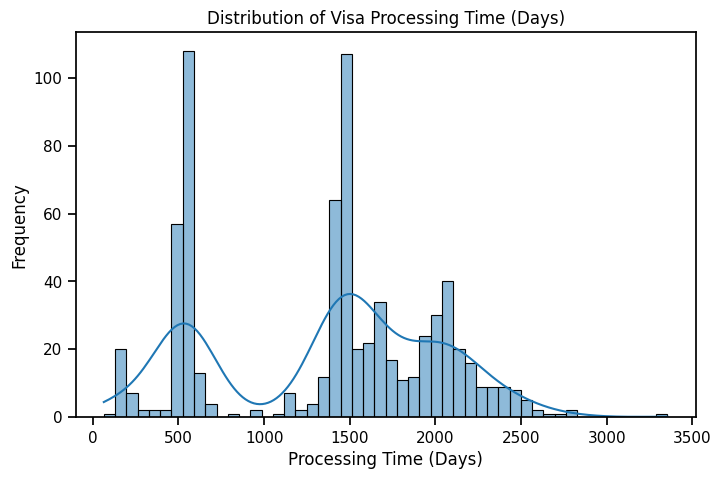

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['processing_time_days'], bins=50, kde=True)
plt.title("Distribution of Visa Processing Time (Days)")
plt.xlabel("Processing Time (Days)")
plt.ylabel("Frequency")
plt.show()


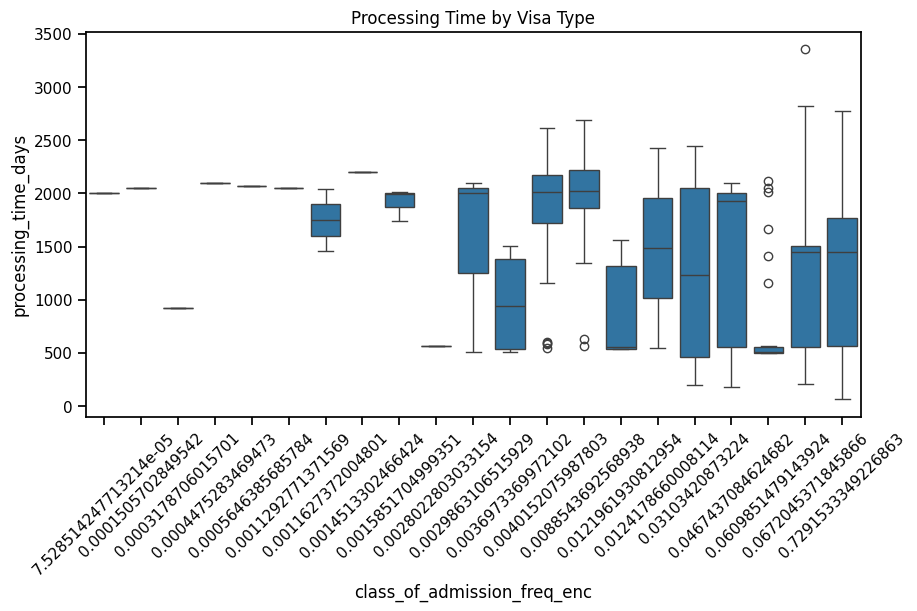

In [ ]:
visa_col = next((c for c in df.columns if 'visa' in c.lower() or 'class' in c.lower()), None)

if visa_col:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x=visa_col, y='processing_time_days')
    plt.xticks(rotation=45)
    plt.title("Processing Time by Visa Type")
    plt.show()
else:
    print("Visa type column not found")


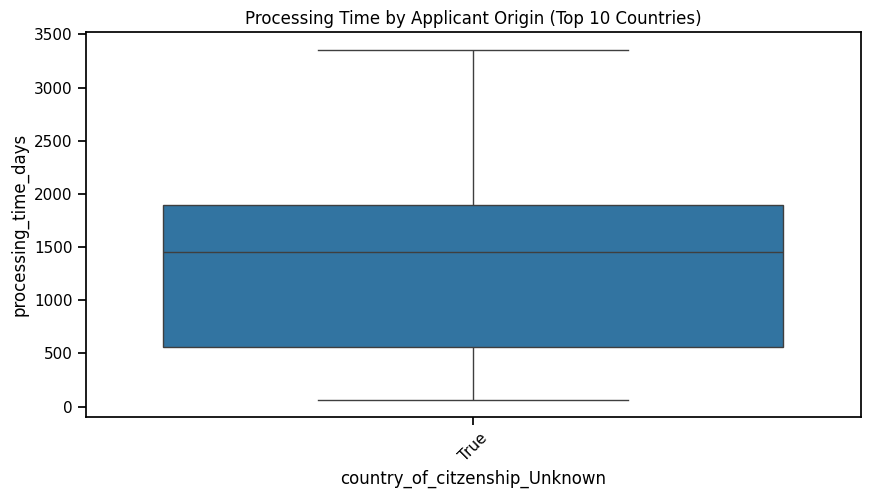

In [ ]:
region_col = next((c for c in df.columns if 'country' in c.lower()), None)

if region_col:
    top_regions = df[region_col].value_counts().head(10).index
    region_df = df[df[region_col].isin(top_regions)]

    plt.figure(figsize=(10,5))
    sns.boxplot(data=region_df, x=region_col, y='processing_time_days')
    plt.xticks(rotation=45)
    plt.title("Processing Time by Applicant Origin (Top 10 Countries)")
    plt.show()
else:
    print("Region column not found")


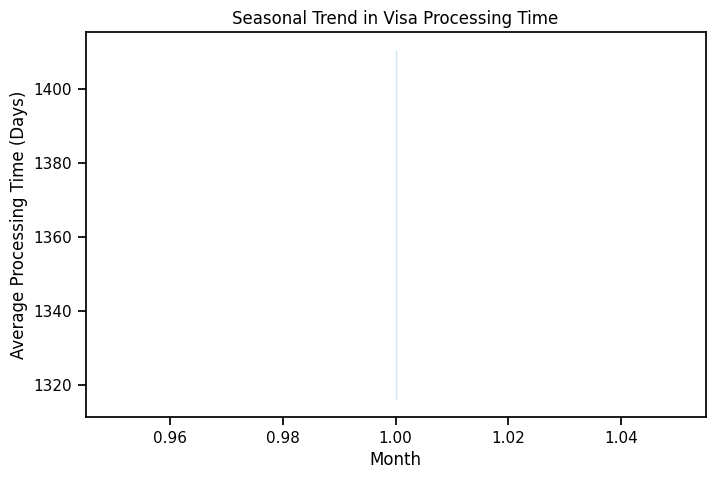

In [ ]:
date_col = next((c for c in df.columns if 'date' in c.lower()), None)

if date_col:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df['month'] = df[date_col].dt.month

    plt.figure(figsize=(8,5))
    sns.lineplot(data=df, x='month', y='processing_time_days')
    plt.title("Seasonal Trend in Visa Processing Time")
    plt.xlabel("Month")
    plt.ylabel("Average Processing Time (Days)")
    plt.show()
else:
    print("Date column not found")


In [ ]:
center_col = next((c for c in df.columns if 'center' in c.lower()), None)

if center_col:
    workload = df.groupby(center_col)['processing_time_days'].mean().sort_values(ascending=False).head(10)

    workload.plot(kind='bar', figsize=(10,5))
    plt.title("Average Processing Time by Processing Center")
    plt.ylabel("Days")
    plt.show()
else:
    print("Processing center column not found")


Processing center column not found


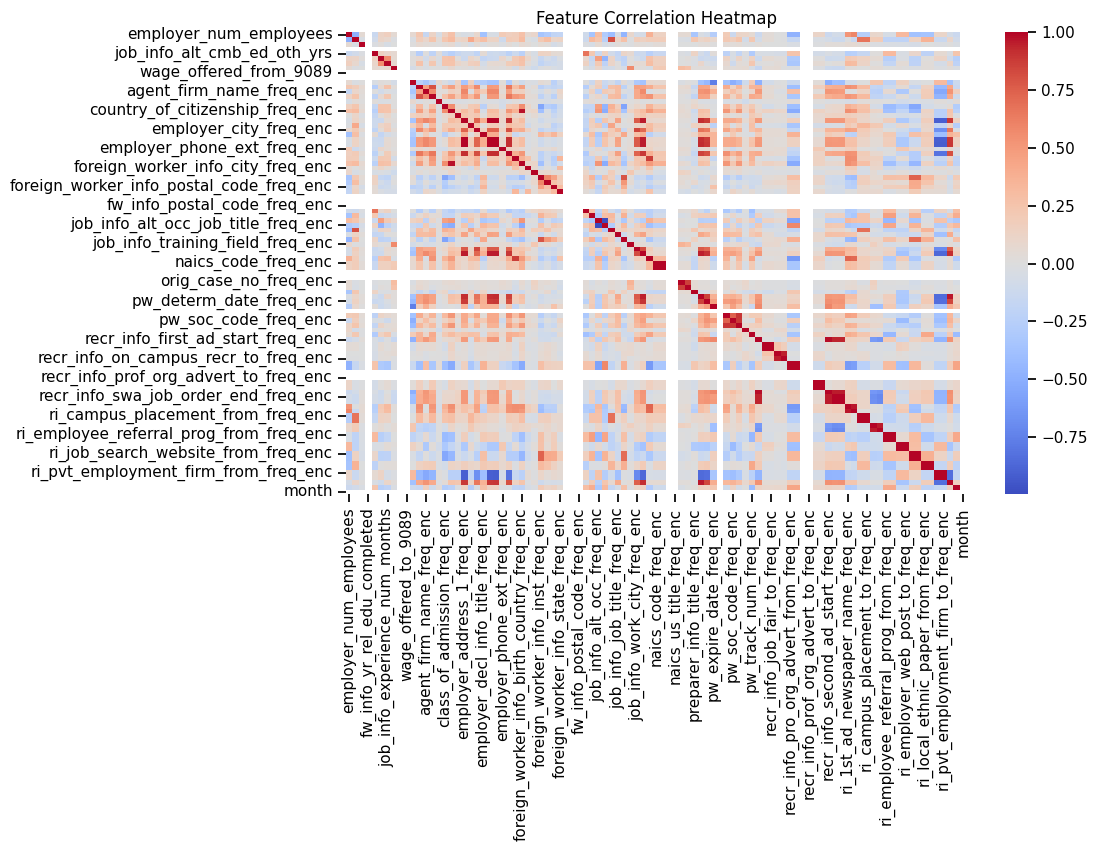

In [ ]:
numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


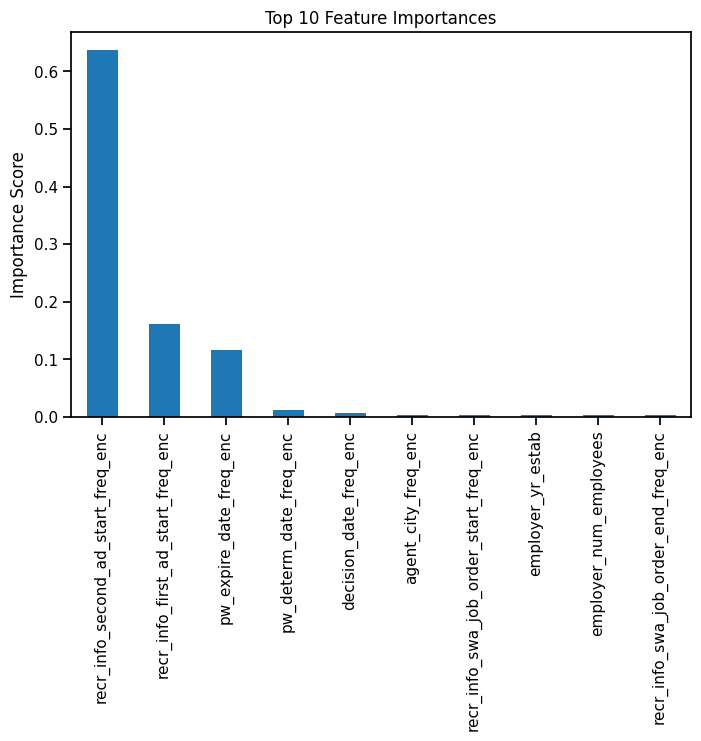

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = numeric_df.drop(columns=['processing_time_days'], errors='ignore')
y = df['processing_time_days']

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)

importance = pd.Series(rf.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
importance.plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.ylabel("Importance Score")
plt.show()
